In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy.core.defchararray import add
import seaborn as sns

In [2]:
#base_dir = '/home1/srashti.goyal/strong-lensing-ml-backup-8aug21/' #Alice
base_dir = '/home/srashti.goyal/strong-lensing-ml/' #CIT

In [3]:
def chirptime_from_mass_forb(chirp_mass, forb=10):
    return (5./256) * chirp_mass**(-5./3) * (2*np.pi*forb)    

In [4]:
import pycbc.conversions as conv

# Loading test set

In [5]:
lensed_data_haris= dict(np.load('../data/injection_pars/haris-et-al/lensed_inj_data.npz'))
unlensed_data_haris= dict(np.load('../data/injection_pars/haris-et-al/unlensed_inj_data.npz'))


In [6]:
df_test=pd.read_csv(base_dir + 'data/dataframes/test/ML_combined_kaggle.csv',index_col=0)
df_test.columns

Index(['img_0', 'img_1', 'Lensing', 'bayestar_skymaps_blu',
       'bayestar_skymaps_d2', 'bayestar_skymaps_d3', 'bayestar_skymaps_lsq',
       'm1, m2, ra, sin_dec, a1, a2, costilt1, costilt2, costheta_jn',
       'm1, m2, ra, sin_dec, costheta_jn', 'ra, sin_dec',
       '# m1, m2, ra, sin_dec, a1, a2, costilt1, costilt2',
       'm1, m2, ra, sin_dec', 'm1, m2', 'xgb_pred_bayestar_skymaps',
       'xgb_pred_bayestar_skymaps_1', 'xgb_pred_bayestar_skymaps_2',
       'xgb_pred_bayestar_skymaps_3', 'xgb_pred_bayestar_skymaps_4',
       'xgb_pred_bayestar_skymaps_5', 'xgb_pred_bayestar_skymaps_6',
       'xgb_pred_bayestar_skymaps_7', 'xgb_pred_bayestar_skymaps_8',
       'xgb_pred_bayestar_skymaps_9', 'xgb_pred_bayestar_skymaps_10',
       'xgb_pred_bayestar_skymaps_fpp', 'ra, sin_dec_fpp', 'dense_H1_0',
       'mean_overlap_qts_H1', 'std_overlap_qts_H1', 'lsq_overlap_qts_H1',
       'dense_L1_0', 'mean_overlap_qts_L1', 'std_overlap_qts_L1',
       'lsq_overlap_qts_L1', 'dense_V1_0', 'me

In [7]:
df_test_old=pd.read_csv(base_dir + 'data/dataframes/test/MLEs_haris_et_al_inc_mchirp_inc_bhattacharya.csv',index_col=0)
df_test_old.columns

Index(['Unnamed: 0.1', 'Unnamed: 0.1.1', 'Unnamed: 0.1.1.1',
       'Unnamed: 0.1.1.1.1', 'Unnamed: 0.1.1.1.1.1', 'Unnamed: 0.1.1.1.1.1.1',
       'img_0', 'img_1', 'Lensing', 'pe_skymaps_blu',
       ...
       'costheta_jn_MLE_img_0', 'costheta_jn_MLE_img_1', 'logl_MLE_img_0',
       'logl_MLE_img_1', 'matched_filter_snr_MLE_img_0',
       'matched_filter_snr_MLE_img_1', 'mchirp_MLE_img_1', 'mchirp_MLE_img_0',
       'mchirp_abs_diff', 'bhattacharya_coeff'],
      dtype='object', length=116)

In [8]:
df_test_old.columns.values

array(['Unnamed: 0.1', 'Unnamed: 0.1.1', 'Unnamed: 0.1.1.1',
       'Unnamed: 0.1.1.1.1', 'Unnamed: 0.1.1.1.1.1',
       'Unnamed: 0.1.1.1.1.1.1', 'img_0', 'img_1', 'Lensing',
       'pe_skymaps_blu', 'pe_skymaps_d2', 'pe_skymaps_lsq',
       'pe_skymaps_d3', 'bayestar_skymaps_blu', 'bayestar_skymaps_d2',
       'bayestar_skymaps_lsq', 'bayestar_skymaps_d3', 'BLU_ra_dec',
       '# dist_sq', 'dist_sq_alpha_inj', 'dist_sq_alpha_marg',
       'costheta_jn', 'costheta_jn, dist_sq',
       'costheta_jn, dist_sq_alpha_inj',
       'costheta_jn, dist_sq_alpha_marg',
       'm1, m2, ra, sin_dec, a1, a2, costilt1, costilt2, costheta_jn',
       'm1, m2, ra, sin_dec, a1, a2, costilt1, costilt2, costheta_jn, dist_sq',
       'm1, m2, ra, sin_dec, a1, a2, costilt1, costilt2, costheta_jn, dist_sq_alpha_inj',
       'm1, m2, ra, sin_dec, a1, a2, costilt1, costilt2, costheta_jn, dist_sq_alpha_marg',
       'm1, m2, ra, sin_dec, costheta_jn', 'ra, sin_dec',
       'all x dist_alpha_inj', 'all x dist'

In [9]:
cols_old = ['img_0', 'img_1', 'Lensing','m1_MLE_img_0',
       'm1_MLE_img_1', 'm2_MLE_img_0', 'm2_MLE_img_1', 'ra_MLE_img_0',
       'ra_MLE_img_1', 'dec_MLE_img_0', 'dec_MLE_img_1', 'a1_MLE_img_0',
       'a1_MLE_img_1', 'a2_MLE_img_0', 'a2_MLE_img_1',
       'costilt1_MLE_img_0', 'costilt1_MLE_img_1', 'costilt2_MLE_img_0',
       'costilt2_MLE_img_1', 'costheta_jn_MLE_img_0',
       'costheta_jn_MLE_img_1', 'logl_MLE_img_0', 'logl_MLE_img_1',
       'matched_filter_snr_MLE_img_0', 'matched_filter_snr_MLE_img_1',
       'mchirp_MLE_img_1', 'mchirp_MLE_img_0', 'mchirp_abs_diff',
       'bhattacharya_coeff']

In [10]:
df_test_old.tail()

,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,Unnamed: 0.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1,img_0,img_1,Lensing,pe_skymaps_blu,...,costheta_jn_MLE_img_0,costheta_jn_MLE_img_1,logl_MLE_img_0,logl_MLE_img_1,matched_filter_snr_MLE_img_0,matched_filter_snr_MLE_img_1,mchirp_MLE_img_1,mchirp_MLE_img_0,mchirp_abs_diff,bhattacharya_coeff
499787,499787,499787,499787,499787,499787,499787,653529000.000000000-307058,521844500.000000000-43689,0,4.424560e-05,...,-0.361726,0.553313,-96105.624454,-96457.305267,8.958544,13.493710,15.741955,81.152666,65.410711,397.019995
499788,499788,499788,499788,499788,499788,499788,618708500.000000000-237417,570250500.000000000-140501,0,8.463995e-173,...,0.413433,0.063741,-95843.275377,-96636.446939,11.169069,11.188854,41.695815,83.559880,41.864065,87.297127
499789,499789,499789,499789,499789,499789,499789,624034000.000000000-248068,658017500.000000000-316035,0,1.657877e-01,...,0.032677,-0.269847,-95913.258227,-96984.749083,17.228599,8.448177,39.887554,13.151348,26.736206,727.311814
499790,499790,499790,499790,499790,499790,499790,531573500.000000000-63147,602280500.000000000-204561,0,0.000000e+00,...,-0.747540,0.439526,-96809.245744,-96305.873848,17.439649,9.686203,83.329568,7.500795,75.828773,421.913615
499791,499791,499791,499791,499791,499791,499791,625278000.000000000-250556,549574500.000000000-99149,0,1.231912e-11,...,-0.082464,-0.082024,-96488.693830,-96361.186208,9.575480,15.136830,37.680049,72.474372,34.794323,112.720401


In [11]:
df_test=pd.merge(df_test,df_test_old[cols_old],on=['img_0','img_1','Lensing'])

In [12]:
df_lensed=df_test[df_test['Lensing'] == 1]


In [13]:
tags=df_lensed['img_0'].str.rsplit('_',1).values


In [14]:
ids=[]
event_tags=[]
for event in tags:
    event_tag=event[0]
    idx=np.where(event_tag==lensed_data_haris['event_tag'])[0][0]
    ids.append(idx),event_tags.append(event_tag)
df_lensed['inj_id']=ids
df_lensed['event_tag'] = event_tags
df_lensed.tail()

/home/srashti.goyal/.conda/envs/igwn-py37-hanabi/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/home/srashti.goyal/.conda/envs/igwn-py37-hanabi/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,img_0,img_1,Lensing,bayestar_skymaps_blu,bayestar_skymaps_d2,bayestar_skymaps_d3,bayestar_skymaps_lsq,"m1, m2, ra, sin_dec, a1, a2, costilt1, costilt2, costheta_jn","m1, m2, ra, sin_dec, costheta_jn","ra, sin_dec",...,logl_MLE_img_0,logl_MLE_img_1,matched_filter_snr_MLE_img_0,matched_filter_snr_MLE_img_1,mchirp_MLE_img_1,mchirp_MLE_img_0,mchirp_abs_diff,bhattacharya_coeff,inj_id,event_tag
490577,6_16_904331947.740842819-1,6_16_904173839.556039214-2,1,2.275851,0.018350,0.127786,0.090225,3.582853e-02,2.686409e-02,0.507282,...,-96552.844879,-96556.291900,6.930910,9.665978,25.369051,102.805446,77.436395,418.759730,91,6_16
490720,6_22752_709667239.609254956-1,6_22752_709666750.975001573-2,1,2.552095,0.020577,0.100705,0.042598,3.263769e+02,4.604500e+02,86.145276,...,-96710.809875,-96389.789505,12.804305,13.007717,122.701334,77.258684,45.442650,19.259340,135,6_22752
491850,8_10927_770537300.748850345-1,8_10927_770537245.180587172-2,1,3.282096,0.026463,0.489408,0.164884,2.508265e+02,4.315757e+02,19.155077,...,-96643.191885,-96194.996332,10.331978,9.119739,97.257959,62.934768,34.323191,44.769872,284,8_10927
498479,7_1004_852645287.421835184-1,7_1004_852645287.399521112-2,1,8326.266857,67.133721,16158.560208,0.044169,2.577874e+08,8.261594e+07,7172.064872,...,-96719.263887,-95788.053521,61.120581,60.722037,64.105714,63.462856,0.642858,0.000959,260,7_1004
499001,2_4335_838371833.252562880-1,2_4335_838365919.945103406-2,1,5.026069,0.040525,0.447944,0.226178,2.881256e+02,1.333246e+03,21.632364,...,-96351.552225,-96452.009790,14.672954,13.251614,91.400402,104.363475,12.963073,1.686823,279,2_4335


In [15]:
df_unlensed=df_test[df_test['Lensing'] == 0]

event_id_dict=dict(zip(unlensed_data_haris['event_tag'],np.arange(len(unlensed_data_haris['event_tag']))))

In [16]:
unlensed_data_haris.keys()

dict_keys(['data_dir', 'event_tag', 'm1z', 'm2z', 'iota', 'ra', 'dec', 'tc', 'ldistance', 'snr', 'phi0', 'pol'])

In [17]:
df_unlensed['id_0'] = [event_id_dict[tag] for tag in df_unlensed['img_0'].values]
df_unlensed['id_1'] = [event_id_dict[tag] for tag in df_unlensed['img_1'].values]

/home/srashti.goyal/.conda/envs/igwn-py37-hanabi/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/srashti.goyal/.conda/envs/igwn-py37-hanabi/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [18]:
df_unlensed['mtotal_0'] = unlensed_data_haris['m1z'][df_unlensed['id_0']]+unlensed_data_haris['m2z'][df_unlensed['id_0']]
df_unlensed['mtotal_1'] = unlensed_data_haris['m1z'][df_unlensed['id_1']]+unlensed_data_haris['m2z'][df_unlensed['id_1']]
df_unlensed['snr_total'] = unlensed_data_haris['snr'][df_unlensed['id_0']]+unlensed_data_haris['snr'][df_unlensed['id_1']]

/home/srashti.goyal/.conda/envs/igwn-py37-hanabi/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/srashti.goyal/.conda/envs/igwn-py37-hanabi/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/srashti.goyal/.conda/envs/igwn-py37-hanabi/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of

In [19]:
df_unlensed['mchirp_0'] = conv.mchirp_from_mass1_mass2(unlensed_data_haris['m1z'][df_unlensed['id_0']],unlensed_data_haris['m2z'][df_unlensed['id_0']])
df_unlensed['mchirp_1'] = conv.mchirp_from_mass1_mass2(unlensed_data_haris['m1z'][df_unlensed['id_1']],unlensed_data_haris['m2z'][df_unlensed['id_1']])


/home/srashti.goyal/.conda/envs/igwn-py37-hanabi/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/srashti.goyal/.conda/envs/igwn-py37-hanabi/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [20]:
df_unlensed['chirp_time_0']=chirptime_from_mass_forb(df_unlensed['mchirp_0'])
df_unlensed['chirp_time_1']=chirptime_from_mass_forb(df_unlensed['mchirp_1'])

/home/srashti.goyal/.conda/envs/igwn-py37-hanabi/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/srashti.goyal/.conda/envs/igwn-py37-hanabi/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [21]:
df_lensed['mtotal']= lensed_data_haris['m1'][df_lensed['inj_id']]+lensed_data_haris['m2'][df_lensed['inj_id']]

/home/srashti.goyal/.conda/envs/igwn-py37-hanabi/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [22]:
df_lensed['mchirp']= conv.mchirp_from_mass1_mass2(lensed_data_haris['m1'][df_lensed['inj_id']],lensed_data_haris['m2'][df_lensed['inj_id']])

/home/srashti.goyal/.conda/envs/igwn-py37-hanabi/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [23]:
df_lensed['chirp_time']=chirptime_from_mass_forb(df_lensed['mchirp'])

/home/srashti.goyal/.conda/envs/igwn-py37-hanabi/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [24]:
df_lensed['snr_0']=lensed_data_haris['snr'][df_lensed['inj_id']][:,0]
df_lensed['snr_1']=lensed_data_haris['snr'][df_lensed['inj_id']][:,1]
df_lensed['snr_total'] = df_lensed['snr_0']+df_lensed['snr_1']

/home/srashti.goyal/.conda/envs/igwn-py37-hanabi/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/srashti.goyal/.conda/envs/igwn-py37-hanabi/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/srashti.goyal/.conda/envs/igwn-py37-hanabi/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of

In [25]:
snr_total = lensed_data_haris['snr'][df_lensed['inj_id']][:,0]+ lensed_data_haris['snr'][df_lensed['inj_id']][:,1]

In [26]:
mtotal=lensed_data_haris['m1'][df_lensed['inj_id']]+lensed_data_haris['m2'][df_lensed['inj_id']]

In [27]:

#df_lensed['sig1_inj'] = 1.2e-4*(df_lensed['snr_1'])*(df_lensed['mchirp'])**(5./3)
#df_lensed['sig0_inj'] = 1.2e-4*(df_lensed['snr_0'])*(df_lensed['mchirp'])**(5./3)
df_unlensed['snr_0'] = unlensed_data_haris['snr'][df_unlensed['id_0']]
df_unlensed['snr_1'] = unlensed_data_haris['snr'][df_unlensed['id_1']]
#df_unlensed['sig1_inj'] = 1.2e-4*(df_unlensed['snr_1'])*(df_unlensed['mchirp_1'])**(5./3)

#df_unlensed['sig0_inj'] = 1.2e-4*(df_unlensed['snr_0'])*(df_unlensed['mchirp_0'])**(5./3)


randoms_unlensed=np.random.randn(len(unlensed_data_haris['snr']))
randoms_lensed=np.random.randn(len(df_lensed['snr_total']))

/home/srashti.goyal/.conda/envs/igwn-py37-hanabi/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/srashti.goyal/.conda/envs/igwn-py37-hanabi/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [28]:
np.random.randn()

0.45680504381418124

In [29]:

#df_lensed['sig1_guess'] = 1.3e-4/(df_lensed['snr_1']-np.random.rand())*(df_lensed['mchirp'])**(5./3)
#df_lensed['sig0_guess'] = 1.3e-4/(df_lensed['snr_0']-np.random.rand())*(df_lensed['mchirp'])**(5./3)
df_lensed['sig1_inj'] = 0.08*8/(df_lensed['snr_1']-np.random.randn())*df_lensed['mchirp']
df_lensed['sig0_inj'] = 0.08*8/(df_lensed['snr_0']-np.random.rand())*df_lensed['mchirp']
df_unlensed['sig1_inj'] = 0.08*8/(df_unlensed['snr_1']-np.random.randn())*df_unlensed['mchirp_1']
df_unlensed['sig0_inj'] = 0.08*8/(df_unlensed['snr_0']-np.random.randn())*df_unlensed['mchirp_0']

#df_unlensed['sig1_guess'] = 1.3e-4/(df_unlensed['snr_1']-np.random.rand())*(df_unlensed['mchirp_1'])**(5./3)
#df_unlensed['sig0_guess'] = 1.3e-4/(df_unlensed['snr_0']-np.random.rand())*(df_unlensed['mchirp_0'])**(5./3)

df_lensed['guess_mchirp_0'] = df_lensed['sig0_inj']*randoms_lensed+ np.log(df_lensed['mchirp'])
df_lensed['guess_mchirp_1'] = df_lensed['sig1_inj']*randoms_lensed+ np.log(df_lensed['mchirp'])

df_unlensed['guess_mchirp_0'] = df_unlensed['sig0_inj']*randoms_unlensed[df_unlensed['id_0']]+ np.log(df_unlensed['mchirp_0'])
df_unlensed['guess_mchirp_1'] = df_unlensed['sig1_inj']*randoms_unlensed[df_unlensed['id_1']]+ np.log(df_unlensed['mchirp_1'])

df_lensed['sig1_guess'] = 0.08*8/(df_lensed['snr_1']-np.random.randn())*df_lensed['guess_mchirp_1']
df_lensed['sig0_guess'] = 0.08*8/(df_lensed['snr_0']-np.random.randn())*df_lensed['guess_mchirp_0']
df_unlensed['sig1_guess'] = 0.08*8/(df_unlensed['snr_1']-np.random.randn())*df_unlensed['guess_mchirp_1']
df_unlensed['sig0_guess'] = 0.08*8/(df_unlensed['snr_0']-np.random.randn())*df_unlensed['guess_mchirp_0']



/home/srashti.goyal/.conda/envs/igwn-py37-hanabi/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/srashti.goyal/.conda/envs/igwn-py37-hanabi/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/srashti.goyal/.conda/envs/igwn-py37-hanabi/lib/python3.7/site-packages/ipykernel_launcher.py

In [30]:
df_test_new=pd.concat([df_lensed,df_unlensed])

In [31]:
def bhattacharya_dist(mu1,sig1,mu2,sig2):
    return 1/4 * np.log(1/4 * ((sig1/sig2)**2 + (sig2/sig1)**2 + 2 ) ) + 1/4 * ((mu1-mu2)**2) / (sig1**2 + sig2**2)


In [32]:
mu1=df_test_new['guess_mchirp_0']
mu2=df_test_new['guess_mchirp_1']

sig1=df_test_new['sig0_guess']


sig2=df_test_new['sig1_guess']



df_test_new['bhattacharya_coeff_guess'] = 1/bhattacharya_dist(mu1,sig1,mu2,sig2)

In [33]:
df_test_new=df_test_new[df_test_new['bhattacharya_coeff_guess'].isna()==False]

2022-04-18 03:26:24.078645: W tensorflow/stream_executor/platform/default/dso_loader.cc:59] Could not load dynamic library 'libcudart.so.10.1'; dlerror: libcudart.so.10.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/intel/oneapi/vpl/2022.0.0/lib:/opt/intel/oneapi/tbb/2021.5.1/env/../lib/intel64/gcc4.8:/opt/intel/oneapi/mkl/2022.0.2/lib/intel64:/opt/intel/oneapi/itac/2021.5.0/slib:/opt/intel/oneapi/ippcp/2021.5.1/lib/intel64:/opt/intel/oneapi/ipp/2021.5.2/lib/intel64:/opt/intel/oneapi/dnnl/2022.0.2/cpu_dpcpp_gpu_dpcpp/lib:/opt/intel/oneapi/debugger/2021.5.0/gdb/intel64/lib:/opt/intel/oneapi/debugger/2021.5.0/libipt/intel64/lib:/opt/intel/oneapi/debugger/2021.5.0/dep/lib:/opt/intel/oneapi/dal/2021.5.3/lib/intel64:/opt/intel/oneapi/compiler/2022.0.2/linux/lib:/opt/intel/oneapi/compiler/2022.0.2/linux/lib/x64:/opt/intel/oneapi/compiler/2022.0.2/linux/lib/oclfpga/host/linux64/lib:/opt/intel/oneapi/compiler/2022.0.2/linux/compiler/lib/intel64_lin:/opt/int

m1, m2 auc = 0.9164
xgb_dense_QTS_0 auc = 0.9040
bhattacharya_coeff_guess auc = 0.8671


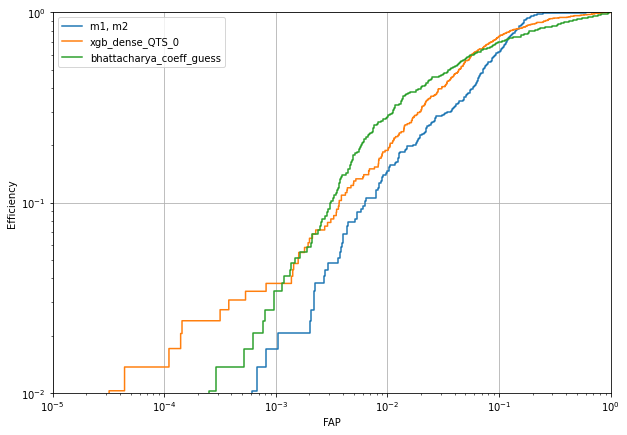

In [34]:
from  lensid.utils import ml_utils as ml
fig=ml.plot_ROCs(df_test_new,cols=['m1, m2','xgb_dense_QTS_0','bhattacharya_coeff_guess'],logy=True,ylim=1e-2)

In [35]:
df_lensed_new=df_test_new[df_test_new['Lensing'] ==1]
df_unlensed_new=df_test_new[df_test_new['Lensing'] ==0]




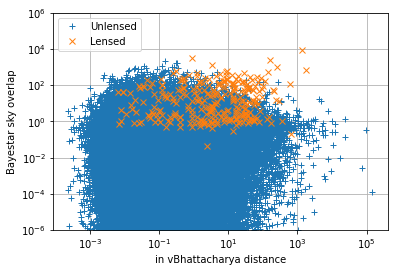

In [47]:
plt.loglog(df_unlensed_new['bhattacharya_coeff_guess'],df_unlensed_new['bayestar_skymaps_blu'],'+',label='Unlensed')
plt.loglog(df_lensed_new['bhattacharya_coeff_guess'],df_lensed_new['bayestar_skymaps_blu'],'x',label='Lensed')
plt.ylim(1e-6,1e6)
plt.xlabel('inv Bhattacharya distance')
plt.ylabel('Bayestar sky overlap')
plt.legend()
plt.grid()
plt.show()

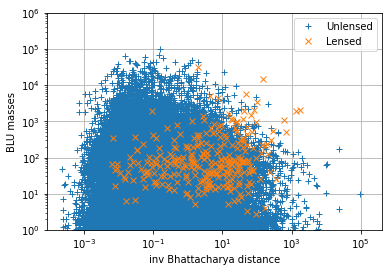

In [46]:
plt.loglog(df_unlensed_new['bhattacharya_coeff_guess'],df_unlensed_new['m1, m2'],'+',label='Unlensed')
plt.loglog(df_lensed_new['bhattacharya_coeff_guess'],df_lensed_new['m1, m2'],'x',label='Lensed')
plt.ylim(1e-0,1e6)
plt.xlabel('inv Bhattacharya distance')
plt.ylabel('BLU masses')
plt.legend()
plt.grid()
plt.show()

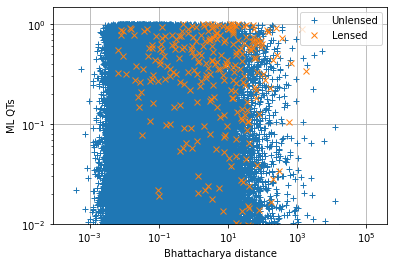

In [45]:
plt.loglog(df_unlensed_new['bhattacharya_coeff_guess'],df_unlensed_new['xgb_dense_QTS_0'],'+',label='Unlensed')
plt.loglog(df_lensed_new['bhattacharya_coeff_guess'],df_lensed_new['xgb_dense_QTS_0'],'x',label='Lensed')
plt.ylim(1e-2,1.5e0)
plt.xlabel('Bhattacharya distance')
plt.ylabel('ML QTs')
plt.legend()
plt.grid()
plt.show()

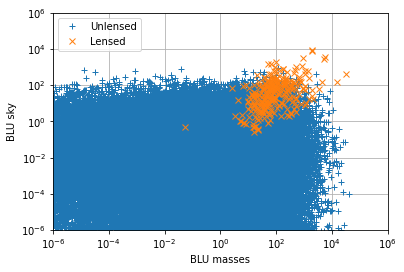

In [39]:
plt.loglog(df_unlensed_new['m1, m2'],df_unlensed_new['ra, sin_dec'],'+',label='Unlensed')
plt.loglog(df_lensed_new['m1, m2'],df_lensed_new['ra, sin_dec'],'x',label='Lensed')
plt.ylim(1e-6,1e6)
plt.xlim(1e-6,1e6)


plt.xlabel('BLU masses')
plt.ylabel('BLU sky')
plt.legend()
plt.grid()
plt.show()

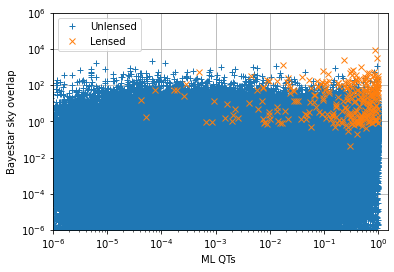

In [40]:
plt.loglog(df_unlensed_new['xgb_dense_QTS_0'],df_unlensed_new['bayestar_skymaps_blu'],'+',label='Unlensed')
plt.loglog(df_lensed_new['xgb_dense_QTS_0'],df_lensed_new['bayestar_skymaps_blu'],'x',label='Lensed')
plt.ylim(1e-6,1e6)
plt.xlim(1e-6,1.5e0)

plt.xlabel('ML QTs ')
plt.ylabel('Bayestar sky overlap')
plt.legend()
plt.grid()
plt.show()